# $k$-means Clustering

In this section of the tutorial, we will investigate the use of $k$-means clustering in `sklearn`. As for all models in the `sklearn` framework, $k$-means mainly rely on `fit(X, y)` and `predict(X)` methods. Once fitted, cluster center coordinates can be accessed _via_ the `cluster_centers_` property.

More information about the use of $k$-means in `sklearn` can be found at: <http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html> (and a demo can be found [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html)).

To begin with, let us import libraries we need and define a function to plot a fitted $k$-means in 2D.

In [1]:
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

def plot_boundaries(model, data):
    xx, yy = np.meshgrid(np.arange(data[:,0].min() - 1., data[:,0].max() + 1., .01),
                         np.arange(data[:,1].min() - 1., data[:,1].max() + 1., .01))
    zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.scatter(data[:, 0], data[:, 1], c="k", s=40, edgecolors="none")
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c="r", s=40, marker="s")
    plt.contourf(xx, yy, zz, alpha=.2)
    plt.xlim(data[:,0].min() - 1., data[:,0].max() + 1.)
    plt.ylim(data[:,1].min() - 1., data[:,1].max() + 1.)

Then, we load some data made of 4 clusters and fit a $k$-means clustering on it (note that, contrary to supervised learning, `fit` method does not require `y` to be passed here):

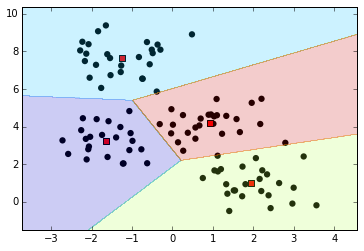

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=4, random_state=0, cluster_std=.8)
model = KMeans(n_clusters=4)
model.fit(X)
plot_boundaries(model, X)

In general, we do not know the number of clusters in advance, so we could vary it and compute silhoutte factor for each $k$:

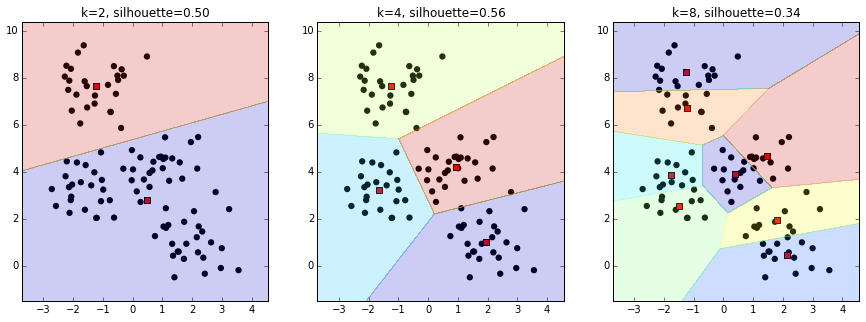

In [3]:
plt.figure(figsize=(15, 5))
for i, k in enumerate([2, 4, 8]):
    plt.subplot(1, 3, i + 1)
    model = KMeans(n_clusters=k)
    model.fit(X)
    plot_boundaries(model, X)
    plt.title("k=%d, silhouette=%.2f" % (k, silhouette_score(X, model.predict(X))))

In this case, silhouette factor indicates to pick the model with $k=4$, which makes sense.